### case- 1 
taking same sigma square

In [82]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data.csv')

data.describe()

,Feature 1,Feature 2,Class
count,100.000000,100.000000,100.000000
mean,7.580466,7.539871,0.500000
std,2.585750,2.633509,0.502519
min,3.420688,3.103700,0.000000
25%,5.122597,4.965303,0.000000
50%,7.446159,7.301240,0.500000
75%,10.136153,10.128602,1.000000
max,11.196909,11.652972,1.000000


### standard deviation value

In [83]:
sigma = (data['Feature 1'].var() + data['Feature 2'].var())/2
sigma

6.810734516303136

In [84]:
class1 = data[data['Class'] == 1]
class2 = data[data['Class'] == 0]


### variance value

In [85]:
sigma_square = sigma**2
sigma_square

46.38610465156292

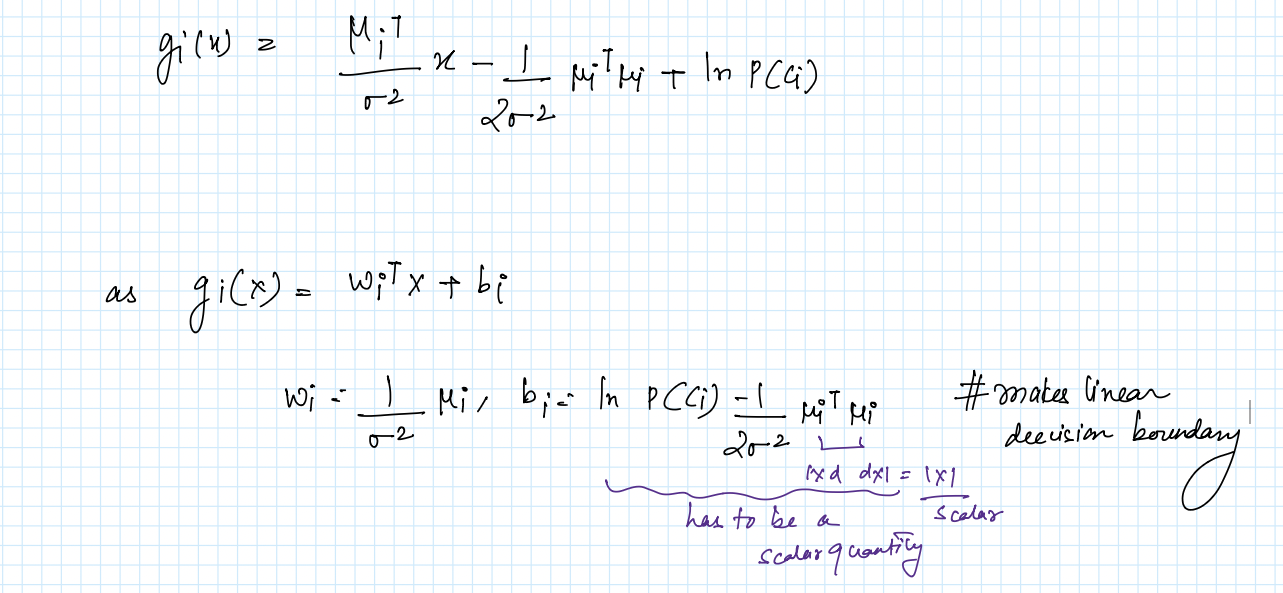

In [86]:
class1_feature1_mean = class1['Feature 1'].mean()
class1_feature2_mean = class1['Feature 2'].mean()

mu_class1 = [class1_feature1_mean, class1_feature2_mean]
w_class1 = [class1_feature1_mean/sigma_square, class1_feature2_mean/sigma_square]
mu_class1 = np.array(mu_class1)
b_class1 = np.log(1/2) - ((np.dot(mu_class1, mu_class1.T)/ (2 * sigma_square)))
class1_coef = [class1_feature1_mean, class1_feature2_mean, b_class1]

In [87]:
class1_coef

[10.06305742438954, 10.089493700085583, -2.8819816319109512]

In [88]:
class2_feature1_mean = class2['Feature 1'].mean()
class2_feature2_mean = class2['Feature 2'].mean()

mu_class2 = [class2_feature1_mean, class2_feature2_mean]
w_class2 = [class2_feature1_mean/sigma_square, class2_feature2_mean/sigma_square]

mu_class2 = np.array(mu_class2)
b_class2 = np.log((1/2)) - ((np.dot(mu_class2, mu_class2.T)/ (2 * sigma_square)))
class2_coef = [class2_feature1_mean, class2_feature2_mean, b_class2]
class2_coef

[5.097874724299217, 4.9902488856710825, -1.2417048901139809]

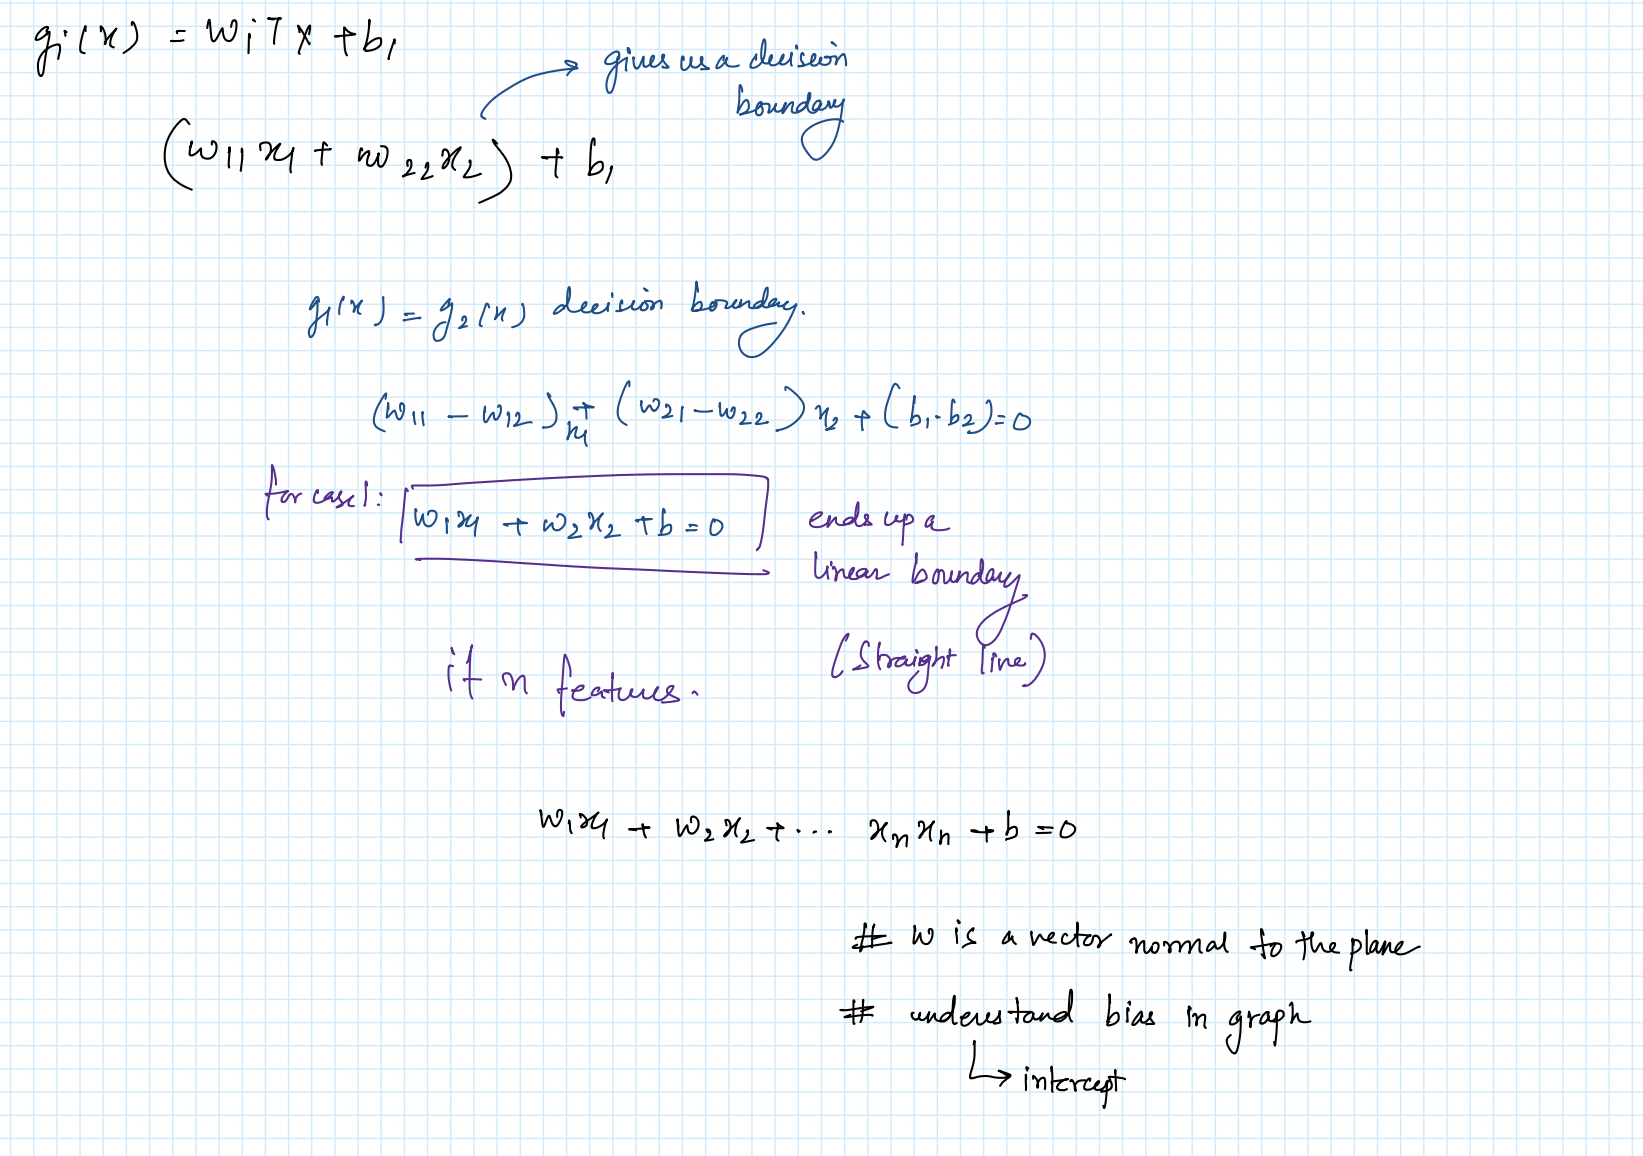

In [89]:
w_class1, w_class2

([0.2169412046986894, 0.2175111226923348],
 [0.10990090162976104, 0.10758068441306254])

In [90]:
w_final = np.array([w_class1[0]-w_class2[0], w_class1[1]-w_class2[1]])
b_final = b_class1 - b_class2

w_final, b_final

(array([0.1070403 , 0.10993044]), -1.6402767417969704)

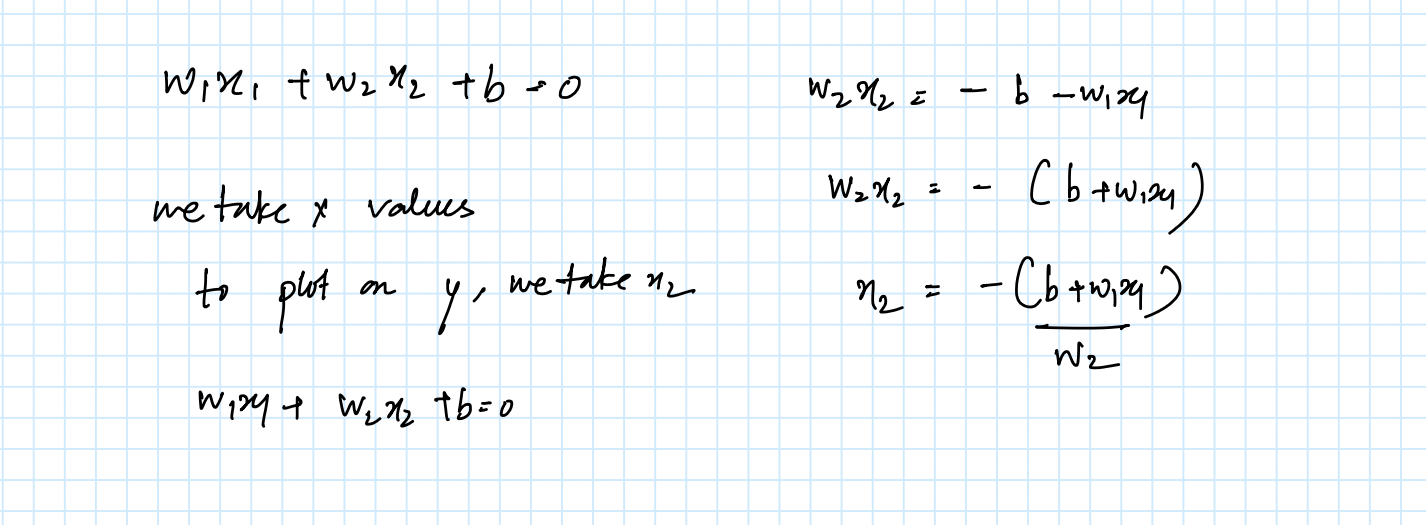

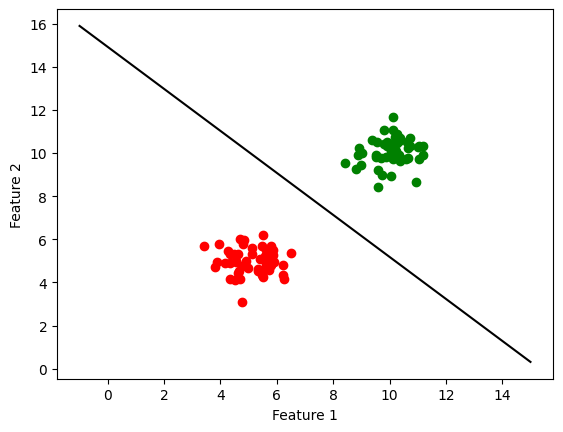

In [92]:
import matplotlib.pyplot as plt

x_values = np.linspace(-1, 15, 50) # 50 evenly separated values between -1 and 6
y_values = - (b_final + w_final[0]*x_values) / w_final[1] # plotting y values

plt.scatter(class1['Feature 1'], class1['Feature 2'], color='green')
plt.scatter(class2['Feature 1'], class2['Feature 2'], color='red')
plt.plot(x_values, y_values, color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()